<a href="https://colab.research.google.com/github/tufts-mathmodeling/HW/blob/master/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('ggplot')

# Problem 1: Whaling (12 points total)
For a given population of whales, an estimate of the annual growth rate of the population without harvesting is given by $G = rx(1-\frac xK)$, where $r=0.05$ is the intrinsic growth rate, $K = 300,000$ is the maximum sustainable population, and $x$ is the current population.  Notice that if $x=0$ or $x=K$, the annual growth rate is zero.  If $0 < x < K$, the annual growth rate is positive, while if $x > K$, the annual growth rate is negative.  If $E$ boat-days of whaling are allowed per year, the annual growth rate is lowered by the amount $H = 0.00001 Ex$, meaning that, for a population of $x$ whales, each boat harvests 0.001\% of the population for each day that it is whaling.  For fixed $E$, the whale population reaches a steady state where the annual growth rate, including harvesting, is zero (i.e., $G=H$).

### Maximizing harvest rate (4 points)

How many boat-days of whaling per year should be allowed to maximize the steady-state harvest rate if the initial whale population is 70,000?  What is the steady-state whale population? Using Matplotlib below, plot the harvest rate and population size as functions of $E$. *(Note: By "boat-days," we mean total days of whaling allowed across all fishermen.  Therefore, there can be more than 365 boat-days a year, since multiple whalers can fish per day.)*

In the KEY PLOT below, the formula for harvest_rate_analytic is intentionally wrong, and the red and yellow plots don't match.  Put in correct code and re-run the plot until they match.  This amounts to validating your analytic solution with an iterative solution.

What you should turn in for this problem:  the solution you worked out on paper, plus KEY PLOT output, with yellow and red MATCHING.  Ask if you need help exporting the plot.

In [0]:
max_pop = 300000             # maximum sustainable population
intrinsic_growth_rate = 0.05 # intrinsic growth rate (annual)

def H(boat_days, curr_pop):
    """Returns the yearly population loss from harvesting."""
    return 0.00001 * boat_days * curr_pop

def G(curr_pop):
    """Returns the yearly population growth, not considering harvesting."""
    return intrinsic_growth_rate * curr_pop * (1 - (curr_pop / max_pop))

In [0]:
def harvest_rate_analytic(boat_days):
    """Computes the steady-state harvest rate (closed-form solution).
    
    :param boat_days: The number of boat-days of harvesting.
    """
    return boat_days + 5  # TODO: Your code here! What is steady state H as a function only of boat days and constants, not current pop? this answer is wrong. 

def harvest_rate_iterative(boat_days, initial_pop=70000, tol=1e-3):
    """Computes the steady-state harvest rate (iterative solution)."""
    pop = initial_pop
    growth = G(pop)
    harvest = H(boat_days, pop)
    while abs(growth - harvest) >= tol:
        pop += growth - harvest 
        growth = G(pop)
        harvest = H(boat_days, pop)
    return harvest

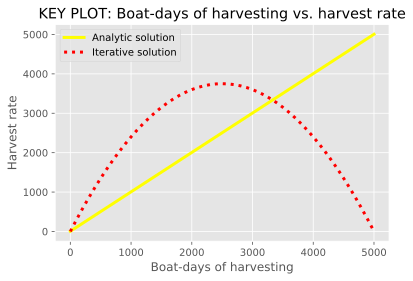

In [4]:
E_vals = np.arange(0, 5001, 100)
plt.plot(E_vals,
         harvest_rate_analytic(E_vals),
         linewidth=3,
         color='yellow',
         label='Analytic solution')
plt.plot(E_vals,
         [harvest_rate_iterative(E) for E in E_vals],
         linewidth=3,
         linestyle=':',
         color='red',
         label='Iterative solution')
plt.legend()
plt.xlabel('Boat-days of harvesting')
plt.ylabel('Harvest rate')
plt.title('KEY PLOT: Boat-days of harvesting vs. harvest rate')
plt.show()

### Sensitivity analysis (intrinsic growth rate) (4 points)


How sensitive is the optimal number of boat-days to the value of $r$?  How sensitive is the steady-state whale population to the value of $r$?  Explain why your answers make sense.

### Maximizing profit (4 points)

Suppose that instead of optimizing the steady-state harvest rate, we seek to maximize the *steady-state* (again $G-H = 0$) annual profit from whaling, given that the cost of whaling is \\$500 per boat-day and that each whale harvested can be sold for \\$6000.  How many boat-days of whaling per year should be allowed to maximize the total annual profit?  What is the steady-state whale population?  Plot the total profit as a function of $E$.  How does this steady-state population compare to the above answer?  Why is it different?

# Problem 2: Blood type frequencies (12 points total)
Human blood is generally classified in the "ABO" system, with four blood types: A, B, O, and AB.  These four types reflect six gene pairs (genotypes), with blood type A corresponding to gene pairs AA and AO, blood type B corresponding to gene pairs BB and BO, blood type O corresponding to gene pair OO, and blood type AB corresponding to gene pair AB.  Let $p$ be the proportion of gene A in the population, $q$ be the proportion of gene B in the population, and $r$ be the proportion of gene O in the population.  Note that $p+q+r = 1$.

### Genotype frequencies (4 points)
The Hardy-Weinberg principle states that $p$, $q$, and $r$ are fixed from generation to generation, as are the frequencies of the different genotypes.  Under this assumption, what is the probability that an individual has genotype AA? BB? OO?  What is the probability of an individual having two different genes?

### Maximizing heterozygous genotypes (4 points)
Find the maximum percentage of the population that can have two different genes under the Hardy-Weinberg principle in two different ways, by directly maximizing a function of only two variables and by using the method of Lagrange multipliers.

### Meaning of the Lagrange multiplier (4 points)
Can you say what the Lagrange multiplier represents in the above example?

# Problem 3: Optimization methods (NOT DUE YET-- here just as a preview)

### Newton's method
As described in class, Newton's method approximates $f(x)$ by the tangent line at the previous iterate, $x_{k-1}$. Convergence is guaranteed if the initial guess, $x_0$, is close enough to the root, and if $f$ is continuously differentiable near the root. Both $f(x)$ and $f'(x)$ are required for implementation.

In [0]:
def newton(f, df, x0, max_steps=100, tol=1e-10):
    """Computes iterates of Newton's method for solving f(x) = 0.
    
    :param f: The function to find a root for.
    :param df: The derivative of the function.
    :param x0: The initial guess.
    :return: The final iterate and the total number of iterations needed.
    """
    x = x0
    for iteration in range(max_steps):
        if abs(f(x)) <= tol:
            return x, iteration
        x -= f(x) / df(x)
    return x, max_steps

### Bisection method
The bisection algorithm assumes that you know two points, $x_\ell$ and $x_r$, for which $f(x_\ell)$ and $f(x_r)$ have opposite signs.  For continuous $f$, this implies there is a zero between $x_\ell$ and $x_r$. **(Think about why.)** To find it, the algorithm iteratively divides the interval from $x_\ell$ to $x_r$ into two parts by examining the sign of $f((x_\ell+x_r)/2)$ and discarding the endpoint of the same sign.  No assumption on $f$ is made aside from continuity, and convergence is always guaranteed.  Only $f(x)$ is needed for implementation.

In [0]:
def bisection(f, x_left, x_right, max_steps=100, tol=1e-10):
    """Computes iterates of the bisection method for solving f(x) = 0.
    
    The signs of f(x_left) and f(x_right) must differ.
    
    :param f: The function to find a root for.
    :param x_left: A guess to the left of the root.
    :param x_right: A guess to the right of the root.
    """
    f_left = f(x_left)
    f_right = f(x_right)
    assert (f_left * f_right).real <= 0 # Signs of initial guesses must differ.
    
    x_middle = (x_left + x_right) / 2
    f_middle = f(x_middle)
    for iteration in range(max_steps):
        if abs(f_middle) <= tol:
            return x_middle, iteration
        # Narrow the search.
        if (f_left * f_middle).real > 0:
            # The left guess and the middle guess have the same sign.
            # Replace the left guess with the middle guess.
            x_left = x_middle
            f_left = f_middle
        else:
            # The right guess and the middle guess have the same sign.
            # Replace the right guess with the middle guess.
            x_right = x_middle
            f_right = f_middle
        # Compute the new middle point.
        x_middle = (x_left + x_right) / 2
        f_middle = f(x_middle)
    return x_middle, max_steps

### Secant method
As described in class, the secant method gets a kth approximate to $f(x)$ by using the secant line between two points, $x_{k-1}$ and $x_{k-2}$.  Convergence is guaranteed if the initial guesses $x_0$ and $x_1$ are close enough to the root, and if $f$ is twice continuously differentiable near the root with nonzero first derivative at the root.  Despite these theoretical limits, a practical bonus is that only $f(x)$ is needed for implementation.

In [0]:
def secant(f, x0, x1, max_steps=100, tol=1e-10):
    """Computes iterates of the secant method for solving f(x) = 0.
    
    :param f: The function to find a root for.
    :param x0: A first initial guess.
    :param x1: A second initial guess.
    :return: The final iterate and the total number of iterations needed.
    """
    x_old = x0
    x_new = x1
    f_old = f(x_old)
    f_new = f(x_new)
    for iteration in range(max_steps):
        if abs(f(x_new)) <= tol:
            return x_new, iteration
        x_next = x_new - (f_new * (x_new - x_old) / (f_new - f_old))
        x_old = x_new
        f_old = f_new
        x_new = x_next
        f_new = f(x_next)
    return x_new, max_steps

### Halley's method
Halley's method (named after Edmond Halley, the comet dude) approximates $f(x)$ by a ratio of linear functions determined by the previous iterate.  The update formula is given by

\begin{equation}
x_{k} = x_{k-1} -
\frac{2f(x_{k-1})f'(x_{k-1})}{2\left(f'(x_{k-1})\right)^2 - f(x_{k-1})f''(x_{k-1})}.
\end{equation}

Convergence is guaranteed if the initial guess, $x_0$, is close enough to the root, and if $f$ is three times continuously differentiable near the root.  All of $f(x)$, $f'(x)$, and $f''(x)$ are required for implementation.

In [0]:
def halley(f, df, ddf, x0, max_steps=100, tol=1e-10):
    """Computes iterates of Halley's method for solving f(x) = 0.
    
    :param f: The function to find a root for.
    :param df: The first derivative of the function.
    :param ddf: The second derivative of the function.
    :param x0: An initial guess.
    :return: The final iterate and the total number of iterations needed.
    """
    x = x0
    for iteration in range(max_steps):
        if abs(f(x)) <= tol:
            return x, iteration
        dividend = 2 * f(x) * df(x)
        divisor = (2 * (df(x) ** 2)) - (f(x) * ddf(x))
        x -= dividend / divisor
    return x, max_steps

## Passing functions to functions

All four root-finding functions take functions as arguments. This is a common pattern used in optimization libraries [such as scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html). In the example below, we define Python functions that correspond to the polynomial $f(x) = x^2 - x - 2$ and its first and second derivative. We then pass these functions to the root-finding functions and compare the results.

In [9]:
def quadratic_f(x):
    return x**2 - x - 2

def quadratic_df(x):
    return (2 * x) - 1 # first derivative of f(x) -- manually computed

def quadratic_ddf(x):
    return 2 # second derivative of f(x) -- manually computed

root_bisect, iter_bisect = bisection(quadratic_f, -5, 0)
root_newton, iter_newton = newton(quadratic_f, quadratic_df, 0)
root_secant, iter_secant = secant(quadratic_f, -5, 0)
root_halley, iter_halley = halley(quadratic_f, quadratic_df, quadratic_ddf, 0)
print(f'The bisection method took {iter_bisect} iterations to find the root x={root_bisect}.')
print(f'The Newton method took {iter_newton} iterations to find the root x={root_newton}.')
print(f'The secant method took {iter_secant} iterations to find the root x={root_secant}.')
print(f'The Halley method took {iter_halley} iterations to find the root x={root_halley}.')

The bisection method took 35 iterations to find the root x=-0.9999999999854481.
The Newton method took 6 iterations to find the root x=-1.0.
The secant method took 8 iterations to find the root x=-1.0000000000000013.
The Halley method took 4 iterations to find the root x=-1.0.


Sometimes, it is cumbersome to define functions in the way illustrated above. Rather than using the `def` keyword, we can use [one-line _lambda expressions_](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) to create anonymous functions—that is, functions without an explicit name. Here's how we might rewrite the root-finding problem above as a series of lambda expressions:

In [10]:
root_halley, iter_halley = halley(lambda x: x**2 - x - 2,
                                  lambda x: (2 * x) - 1,
                                  lambda x: 2,
                                  0)
print(f'The Halley method took {root_halley} iterations to find the root x={iter_halley}.')

The Halley method took -1.0 iterations to find the root x=4.


## Exercises

### Microprocessor division with Newton's method (NOT DUE YET)
One of the uses of Newton's method is in implementing division on microprocessors, where only addition and multiplication are available as primitive operations.  To compute $x=\frac{a}{b}$, first the root of $f(x) = \frac{1}{x} - b$ is found using Newton's method, then the fraction is computed with one last multiplication by $a$.  

**(i)** Find the Newton iteration needed to solve $f(x)=0$ and explain why it is well-suited to this purpose.  *(Hint: We are trying to approximate division, so we shouldn't actually use it...)*

**(ii)** Explain why Halley's method cannot be used for this purpose.

**(iii)** Apply Newton's method to computing $1/b$, where $b$ is (a) the last 3 digits of your student ID number; and (b) the area code of your phone number. For these experiments, report the iterates until the approximation is consistent with the last iterate to 10 digits (you will need to modify the given code in order to do so). For instance, `newton_division(1, 3, 0.01)` should print something like:
```
Iteration 0: 1/b = 0.01
Iteration 1: 1/b = 0.0197
Iteration 2: 1/b = 0.038235729999999996
Iteration 3: 1/b = 0.07208554685410129
Iteration 4: 1/b = 0.1285821155124381
Iteration 5: 1/b = 0.20756414973591425
Iteration 6: 1/b = 0.2858796707050494
Iteration 7: 1/b = 0.3265777830428163
Iteration 8: 1/b = 0.3331964209541502
Iteration 9: 1/b = 0.33333327709833466
Iteration 10: 1/b = 0.3333333333333238
Iteration 11: 1/b = 0.3333333333333333
```


In [0]:
student_number = 123  # Your student number here!
area_code = 617       # Your area code here!

In [0]:
def newton_division(a, b, x0, max_steps=100, tol=1e-10):
    """Divides two numbers using Newton's method and returns the result.
    
    Your solution should *not* use the division operator. Rather than
    calling the newton() method, which uses division, use the specialized
    Newton iteration you found in part (i).
    
    Print the estimate of 1/b for each iteration of Newton's method.
    
    :param a: The dividend.
    :param b: The divisor.
    :param x0: The initial guess.
    """
    # TODO: Your code here!

In [14]:
# Unit tests for newton_division().
# Use these to make sure your implementation is behaving properly.
div_tol = 1e-10
assert abs(newton_division(1, 3, 0.01) - 1/3) <= div_tol
assert abs(newton_division(-2, 17, 0.01) + 2/17) <= div_tol
assert abs(newton_division(0, 2, 0.01)) <= div_tol

Iteration 0: 1/b = 0.01
Iteration 1: 1/b = 0.0197
Iteration 2: 1/b = 0.038235729999999996
Iteration 3: 1/b = 0.07208554685410129
Iteration 4: 1/b = 0.1285821155124381
Iteration 5: 1/b = 0.20756414973591425
Iteration 6: 1/b = 0.2858796707050494
Iteration 7: 1/b = 0.3265777830428163
Iteration 8: 1/b = 0.3331964209541502
Iteration 9: 1/b = 0.33333327709833466
Iteration 10: 1/b = 0.3333333333333238
Iteration 11: 1/b = 0.3333333333333333
Iteration 0: 1/b = 0.01
Iteration 1: 1/b = 0.0183
Iteration 2: 1/b = 0.030906870000000003
Iteration 3: 1/b = 0.0455747515756527
Iteration 4: 1/b = 0.0558395174712036
Iteration 5: 1/b = 0.058672155848320716
Iteration 6: 1/b = 0.05882313987451764
Iteration 7: 1/b = 0.05882352940918514
Iteration 8: 1/b = 0.058823529411764705
Iteration 0: 1/b = 0.01
Iteration 1: 1/b = 0.0198
Iteration 2: 1/b = 0.038815920000000004
Iteration 3: 1/b = 0.0746184887091072
Iteration 4: 1/b = 0.13810113970375207
Iteration 5: 1/b = 0.23805842983255365
Iteration 6: 1/b = 0.362773227636

In [15]:
print(f'By Newton division, 1/{student_number} is {newton_division(1, student_number, 0.001)}.')
print(f'By Newton division, 1/{area_code} is {newton_division(1, area_code, 0.001)}.')

Iteration 0: 1/b = 0.001
Iteration 1: 1/b = 0.001877
Iteration 2: 1/b = 0.003320655133
Iteration 3: 1/b = 0.005285019952984733
Iteration 4: 1/b = 0.007134473289845516
Iteration 5: 1/b = 0.008008159357498183
Iteration 6: 1/b = 0.008128252910700825
Iteration 7: 1/b = 0.00813008088962273
Iteration 8: 1/b = 0.008130081300812988
Iteration 9: 1/b = 0.008130081300813007
By Newton division, 1/123 is 0.008130081300813007.
Iteration 0: 1/b = 0.001
Iteration 1: 1/b = 0.0013830000000000001
Iteration 2: 1/b = 0.001585870887
Iteration 3: 1/b = 0.0016199951218655191
Iteration 4: 1/b = 0.0016207451954974343
Iteration 5: 1/b = 0.0016207455429496824
Iteration 6: 1/b = 0.001620745542949757
By Newton division, 1/617 is 0.001620745542949757.


### Square roots with Newton's method (NOT DUE YET)

Another use for Newton's method and other rootfinding approaches is for computing square roots, by solving for zeros of $f(x) = x^2-a$.  Apply all of the above methods to computing $\sqrt{a}$ where $a$ is (a) the last 3 digits of your student number and (b) the area code of your phone number. Explain how you choose good initial guesses, and report the number of iterations needed for convergence.

In [0]:
def newton_sqrt(a, x0):
    """Finds the square root of a number using Newton's method.
    
    Your code should pass a function and its derivative to the
    newton() function and return the square root of `a` and the
    number of iterates required.
    
    :param a: The number to find a square root of.
    :param x0: An initial guess of the square root.
    """
    # TODO: Your code here!

In [0]:
# Unit tests for newton_division().
# Use these to make sure your implementation is behaving properly.
sqrt_tol = 1e-5
for a in (0, 0.001, 0.01, 0.1, 1, 10, 100, 1000):
    sqrt_a, _ = newton_sqrt(a, 1)
    assert abs(sqrt_a - np.sqrt(a)) <= sqrt_tol

In [0]:
# TODO: Your code here!
# Use newton_sqrt() to compute the square root of the last 3 digits
# of your student number and the area code of your phone number.
# Print the square roots and the number of iterations necessary to find them.

### Comparison of methods (NOT DUE YET)
In this problem, we'll look at performance of various methods for functions where the assumptions needed for convergence are violated.  Consider the 3 functions
 
\begin{align*}
f_1(x) & = x^3 \\
f_2(x) & = x^3 + 2x \\
f_3(x) & = x^3 + 2x^{5/4}
\end{align*}

Report on the iteration counts for each algorithm for each function to find the root at $x=0$ for consistent initial guesses (be sure to avoid cases where the algorithms get "lucky" and find the solution $x=0$ at their first step).  Explain how this correlates with the explanations given above.

In [0]:
labels = ['x³', 'x³ + 2x', 'x³ + 2x⁵⁄⁴']

functions = [
    lambda x: x**3,
    lambda x: x**3 + (2 * x),
    lambda x: x**3 + (2 * x**1.25)
]

df_funcs = [
    # TODO: Your code here!
    # Write lambda expressions for the first derivatives
    # of the three functions above.
]

ddf_funcs = [
    # TODO: Your code here!
    # Write lambda expressions for the second derivatives
    # of the three functions above.
]

In [23]:
for label, f, df, ddf in zip(labels, functions, df_funcs, ddf_funcs):
    print('---', label, '---')
    # TODO: Your code here!
    # For each function, call the four root-finding methods and report
    # the roots and the iterates. Use the first derivative and second
    # derivative functions as necessary.
    print()

--- x³ ---

--- x³ + 2x ---

--- x³ + 2x⁵⁄⁴ ---

